# Election Scenario

* Candidate A won the state by an average of 4% points, however they lost District 29 to candidate B by 22%, making it a significant outlier. 
* The final results for the distrct are 39% Candidate A, 61% Candidate B. 
* You are tasked to investigate this to determine if it is worth a thorough follow-up.
* You call a a hundred members of the general public who reported as voting. 48 out of the 100 reported voting for Candidate A. 
* What do you report?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


*What is the chance that Candidate A got more votes than was officially reported?*


*   Null Hypothesis: 39% of votes went to Candidate A while 61% of votes went towards Candidate B.
*   Alternative Hypothesis: More than 39% of votes went to Candidate A and less than 61% of votes went towards Candidate B.



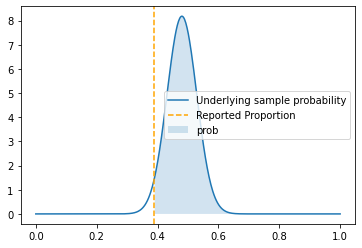

In [2]:
# proportion testing is when you approximate the binomial distribution as a normal distrbution
# and run tests on the approximated normal distribution rather than the binomial distribution itself
# hence why we need a large enough sample size

sigma = np.sqrt(0.39 * 0.61 / 100)
reported = 0.39
sample = 0.48

xs = np.linspace(0, 1, 500) # list of sample x values

# ps are the probabilities of each x value in xs
# we're using the normal distributions pdf to approximate the y values from the sample of x values
ps = norm.pdf(xs, sample, sigma) 
plt.plot(xs, ps, label="Underlying sample probability")
plt.axvline(reported, ls="--", color="orange", label="Reported Proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where= xs >= reported, label="prob")
plt.legend();

# the true value of ppl who actually voted for Candidate A can be described by the blue pdf

In [3]:
# using survival function to calculate the probability that more people voted for Candidate A
prob_more = norm.sf(reported, sample, sigma)
print(f"There is a {prob_more * 100:.1f} % chance that Candidate A would've received more votes")

There is a 96.7 % chance that Candidate A would've received more votes


In [4]:
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.95)

print(f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f}, so we are significant")
print(f"Have p-value {norm.sf(sample, reported, sigma):.3f}")

1.845 is larger than 1.645, so we are significant
Have p-value 0.033


Follow up: What if instead of asking *What is the chance that Candidate A got more votes than was officially reported?*, we instead asked *What is the chance that Candidate A got a significantly different amount of votes than reported?*

This is a two-tailed test and let p = 0.05

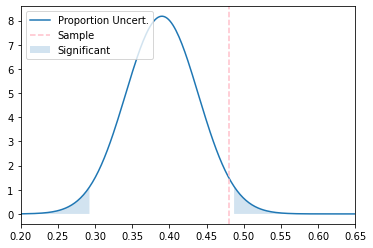

In [5]:
xs = np.linspace(0,1,500)
ps = norm.pdf(xs, reported, sigma)

plt.plot(xs, ps, label="Proportion Uncert.")
plt.axvline(sample, ls="--", label="Sample", color="pink")
limits = norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha=0.2, where=( xs < limits[0])| (xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);

In [6]:
# using z-score
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975)
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# using p-values
p_value_two_tailed = 2 * norm.sf(z_score)
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05
